# 0715 0716 0717
## 데이터시각화

### 그래프그리기(pyplot 모듈 사용)
* import matplotlib.pyplot as plt  
plt.plot([데이터], 그래프옵션): 직선 또는 꺾은선 형태의 그래프 그릴때 사용  
plt.show(): 그래프 보여주기  
plt.savefing("파일이름", dpi=200): 그래프를 파일로 저장

* 그래프 옵션  
1) 색상정보; 코드번호로 사용. 기본적인 색은 이름으로 가능  
2) 선종류; 점선':', 점실선?'-.', 긴점선'--', 실선'-'  
3) Marker; 'D', 'o', '^', 's', 'h', 'x',,,

* plt.plot([x축 데이터], [y축 데이터]); 그래프 그리기(x축, y축 데이터)  
ㄴx축 데이터에 문자열 가능.  
plt.title('제목'); 그래프 제목 넣기
plt.plot(어쩌구... label='범례'); 각 그래프당 이름 추가
plt.legend(loc=n); 범례 위치 설정 해줘야함
* plt.hist()
* plt.bar()
 
* csv파일의 문자열에서 ',' 제거 후 숫자로 변환? replace 사용  
int(어쩌구.replace(',',''))  
반대로 ','추가해서 출력하는 경우; print("저쩌구", format(어쩌구, ','))  

* map(function, iterable); 리스트의 요소를 지정된 함수로 처리함


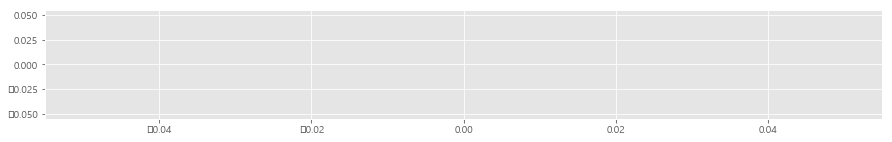

In [17]:
# 8월달의 최고기온 데이터를 리스트로 만들어서 그래프로 그리기
import csv
import matplotlib.pyplot as plt
f = open('daegu.csv')
data = csv.reader(f)
next(data)
result = []

for row in data :
    if row[-1] != '' :
        if row[0].split('-')[1] == '8':
            result.append(float(row[-1]))

f.close()
plt.figure(figsize=(15,2)) # 그래프 크기 조절(가로 10인치, 세로 2인치)
plt.plot(result, 'royalblue') # result 리스트에 저장된 값을 빨간색 그래프로 그리기
plt.show() # 그래프 나타내기

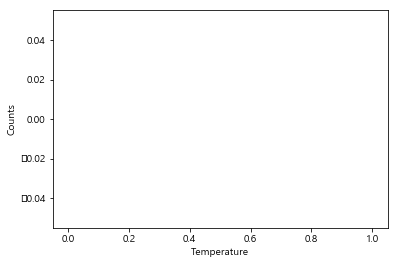

In [3]:
# 기온 히스토그램으로 나타내기
import csv
import matplotlib.pyplot as plt
f = open('daegu.csv')
data = csv.reader(f)
next(data)
aug = []

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '' :
        if month == '8':
            aug.append(float(row[-1]))

f.close()
plt.hist(aug, bins = 100, color = 'tomato')
plt.xlabel("Temperature") # x축 레이블
plt.ylabel("Counts") # y축 레이블
plt.show()

In [25]:
# 2018110781 김지현
# HW10; 2009년~2018년사이, 각 달의 일교차를 비교하여 각 년도별 일교차가 가장 큰 달을 bar 그래프로 표시

import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

f = open('daegu.csv', 'r')
data = csv.reader(f)
next(data)
temp_diff = [[0 for i in range(12)] for j in range(10)]
cnt = [[0 for i in range(12)] for j in range(10)]

for row in data:
    year = int(row[0].split('-')[0])
    month = int(row[0].split('-')[1])
    if row[-1] == '' or row[-2] == '':
        continue
    elif year>2008 and year<2019:
        for j in range(10):
            if year==(2009+j):
                daily = float(row[-1])-float(row[-2])
                for i in range(len(temp_diff[j])):
                    if month==(i+1):
                        temp_diff[j][i] += daily
                        cnt[j][i] += 1

for j in range(len(temp_diff)):
    for i in range(len(temp_diff[j])):
        temp_diff[j][i] = temp_diff[j][i]/cnt[j][i]

f.close()

font_name = fm.FontProperties(fname ='C:\Windows\Fonts\malgun.ttf').get_name()
x = []
y = []

print("대구 월별 평균 기온차")
for i in range(len(temp_diff)):
    x.append('%d.%d' % (i+2009, temp_diff[i].index(max(temp_diff[i]))+1))
    y.append(max(temp_diff[i]))
    print("%s: %.1f" % (x[i], y[i]))

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='royalblue')
plt.rc('font', family=font_name)
plt.title("2009년부터 2018년까지 대구의 평균 일교차가 가장 큰 달")
plt.show()
  

여름철 평균기온:
6월 평균 기온: 28.22도
7월 평균 기온: 30.52도
8월 평균 기온: 31.04도
9월 평균 기온: 26.67도
대구에서 가장 더운 달은 8월이고, 평균기온은 31.04도 였습니다.

겨울철 평균기온:
12월 평균 기온: -1.87도
1월 평균 기온: -3.85도
2월 평균 기온: -1.93도
대구에서 가장 추운 달은 1월이고, 평균기온은 -3.85도 였습니다.



인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: 산격3


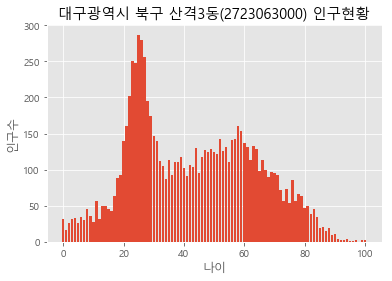

In [16]:
# 지역 입력받아 인구 분포 그래프 그리기
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def draw_population(district):
    f = open('age.csv')
    data = csv.reader(f)
    result = []
    full_district_name = ''

    for row in data:
        if district in row[0]:
            full_district_name = row[0]
            for data in row[3:]:
                result.append(int(data))
    
    f.close()

    font_name = fm.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
    plt.rc('font', family=font_name)
    
    plt.bar(range(101), result)
    plt.title('{0} 인구현황'.format(full_district_name))
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.style.use('ggplot')
    plt.show()
    
def main():
    district = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ")
    draw_population(district)

main()

찾고 싶은 지역의 이름을 입력하세요: 제주
제주 남자 인구수: 336,944명, 여자 인구수: 332,827명


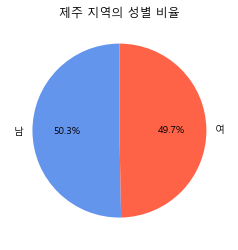

In [4]:
# 파이차트; 자동으로 비율 파악
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='euc_kr')
data = csv.reader(f)
population=[] # Pie chart에 넣을 데이터 (남, 여 인구수)
city = input('찾고 싶은 지역의 이름을 입력하세요: ')
male_count = 0
female_count = 0
for row in data:
    if city in row[0]:
        male_count = int(row[1].replace(',', '')) # 자리수 문자열 제거 및 숫자로 변환
        female_count = int(row[104].replace(',', ''))
        break # 도시별 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
        
print("{0} 남자 인구수: {1}명, 여자 인구수: {2}명".format(city, format(male_count, ','), format(female_count, ',')))
population = [male_count, female_count]
plt.rc('font', family='Malgun Gothic')

color = ['cornflowerblue', 'tomato']
plt.pie(population, labels=['남', '여'], autopct='%.1f%%', colors=color, startangle=90)
plt.title(city + " 지역의 성별 비율")
plt.show()

찾고 싶은 지역의 이름을 입력하세요: 제주


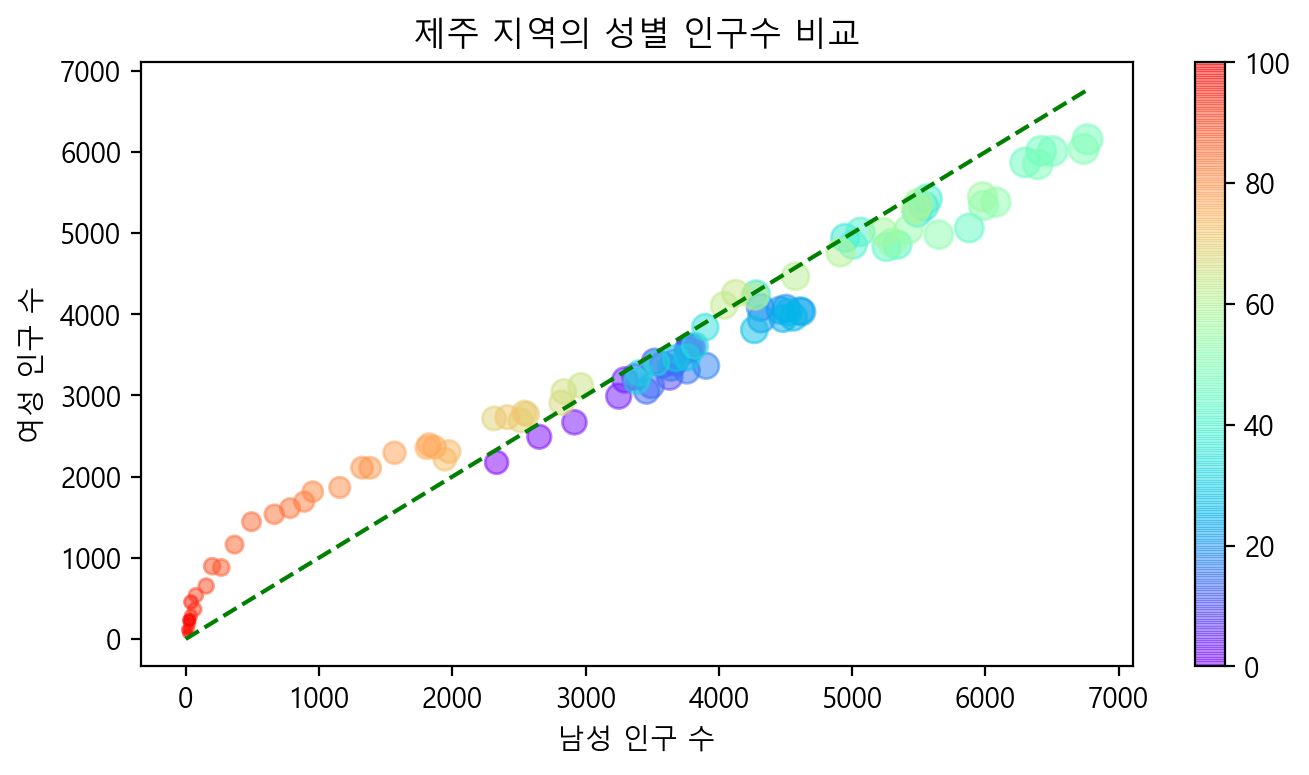

In [7]:
# 제주도의 연령대별 성별 비율 산점도
import csv
import matplotlib.pyplot as plt
import math

f = open('gender.csv')
data = csv.reader(f)

male_list = []
female_list = []
male_num = 0
female_num = 0
bubble_size = []
city = input('찾고 싶은 지역의 이름을 입력하세요: ')
for row in data:
    if city in row[0]:
        for i in range(3,104):
            male_num = int(row[i].replace(',',''))
            female_num = int(row[i+103].replace(',',''))
            bubble_size.append(math.sqrt(male_num+female_num))
            male_list.append(male_num)
            female_list.append(female_num)
        break
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize = (8,4), dpi=200)
plt.scatter(male_list, female_list, s=bubble_size, c=range(101), alpha=0.5, cmap='rainbow')
plt.colorbar()
plt.plot(range(max(male_list)), range(max(male_list)), 'g--')

plt.title(city + " 지역의 성별 인구수 비교")
plt.xlabel('남성 인구 수')
plt.ylabel('여성 인구 수')
plt.show()

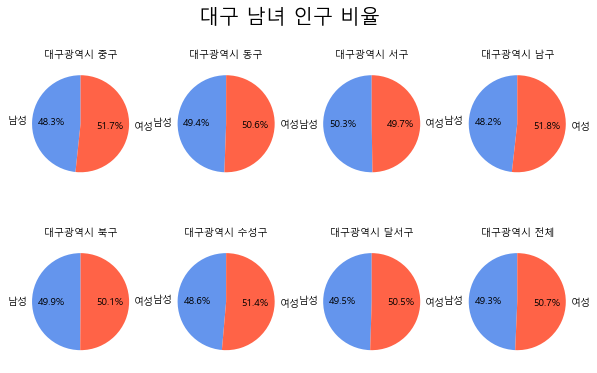

In [32]:
# 2018110781 김지현
# HW11 대구시의 구별 남녀 비율 및 대구시 전체의 남녀 비율을 각각의 파이 차트로 표현

import csv
import matplotlib.pyplot as plt

f = open('gender.csv')
data = csv.reader(f)
population = [[]for i in range(8)]
population[7] = [0,0]

city = ['중구', '동구', '서구' , '남구', '북구', '수성구', '달서구', '']
for i in range(7):
    for row in data:
        if ('대구광역시 '+city[i]) in row[0]:
            population[i].append(int(row[1].replace(',', '')))
            population[i].append(int(row[104].replace(',', '')))
            population[7][0] += int(row[1].replace(',', ''))
            population[7][1] += int(row[104].replace(',', ''))
            break

plt.rc('font', family='Malgun Gothic')

fig, axes = plt.subplots(2,4, figsize=(10, 6))
fig.suptitle("대구 남녀 인구 비율", size=20)

color = ['cornflowerblue', 'tomato']
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.pie(population[i], labels=['남성', '여성'], autopct='%.1f%%', colors=color, startangle=90)
    if city[i]=='':
        plt.title('대구광역시 전체', size=10)
    else:
        plt.title('대구광역시 '+city[i], size=10)
    
plt.show()

['Jun.19', '1호선', '157', '제기동', 272032, 262364, 338251, 360782]
['Jun.19', '1호선', '158', '청량리(서울시립대입구)', 434832, 450201, 320309, 326952]
['Jun.19', '1호선', '159', '동묘앞', 178254, 195117, 162450, 163978]
['Jun.19', '경원선', '1903', '도봉산', 162282, 93639, 112945, 90606]
['Jun.19', '경원선', '1916', '소요산', 52142, 41054, 86684, 74941]
['Jun.19', '중앙선', '1216', '오빈', 6092, 5849, 4633, 4624]
['Jun.19', '중앙선', '1218', '원덕', 7241, 6799, 7137, 6931]
['Jun.19', '중앙선', '1219', '용문', 43299, 44416, 48114, 47604]
['Jun.19', '경춘선', '1322', '상천', 7670, 6753, 6575, 6474]
['Jun.19', '우이신설선', '4705', '화계', 59315, 50807, 41931, 43078]
['Jun.19', '우이신설선', '4706', '삼양', 34078, 34944, 26838, 29774]
['Jun.19', '우이신설선', '4707', '삼양사거리', 37006, 37146, 36641, 37432]


유임 승차 비율이 가장 낮은 역: 소요산, 전체 인원: 138,826, 유임승차인원: 52,142, 유임승차 비율: 0.38


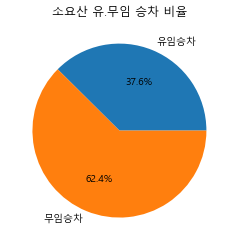

In [19]:
# 대중교통 데이터 분석; 유임승차비율이 60% 이하인 역
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
min_rate = 1
rate = 0
nodap_row = []
min_row = []
total_cnt = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 4, 5, 6, 7 컬럼값을 정수로 변환
    total_cnt = row[4]+row[6]
    if row[6]!=0 and total_cnt>10000:
        rate = row[4]/total_cnt
        if rate <= 0.6:
            nodap_row.append(row)
        if rate < min_rate:
            min_row = row
            min_rate = rate
            
for row in nodap_row:
    print(row)
print('\n')
print("유임 승차 비율이 가장 낮은 역: {}, 전체 인원: {}, 유임승차인원: {}, 유임승차 비율: {}".format(min_row[3], format(int(min_row[4])+int(min_row[6]), ','), format(min_row[4], ','), round(min_rate,2)))

plt.rc('font', family='Malgun Gothic')
plt.title('소요산 유.무임 승차 비율')
plt.pie([min_rate*100, 100*(1-min_rate)], labels=['유임승차', '무임승차'], autopct='%.1f%%')
plt.show()

In [24]:
# 파이그래프 파일 저장하기; savefig('파일이름')
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.rc('font', family='Malgun Gothic')
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    plt.figure(dpi = 300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels = label, colors = c, autopct = '%1.f%%')
    plt.savefig(row[3] + ' ' +row[1] + '.png') #파일 저장
    plt.close() # 파일 닫기
    plt.show() # 화면 출력

총 지하철 역의 수:  596
새벽 4시 인원:  135,386
최대 승차역: 구로, 인원수: 11,780 


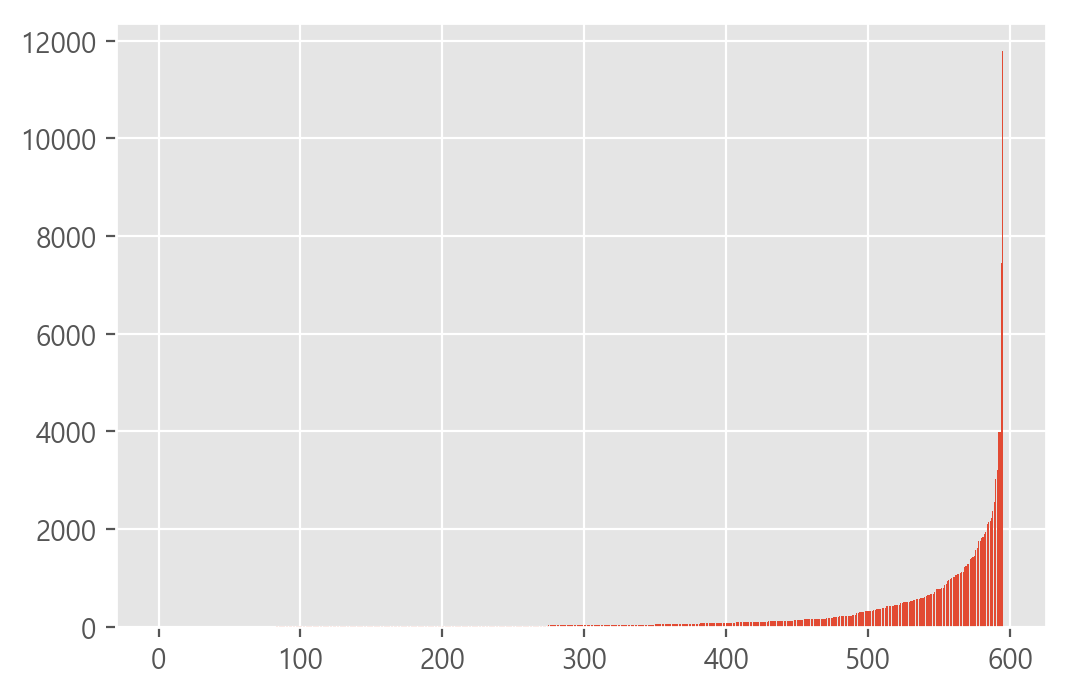

In [29]:
# 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
# 0 1 2 3 4 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='utf-8')
data = csv.reader(f)
next(data) # 2줄의 헤더 정보 건너뜀
next(data)

result = []
total_number = 0
max_num = 0
max_city = ''
for row in data:
    row[4:] = map(int, row[4:])
    total_number += row[4]
    result.append(row[4])
    if(row[4] > max_num):
        max_num = row[4]
        max_city = row[3]
print("총 지하철 역의 수: ", len(result))
print("새벽 4시 인원: ", format(total_number, ','))
print("최대 승차역: {0}, 인원수: {1} ".format(max_city, format(max_num, ',')))
result.sort() # 오름차순으로 정렬
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.bar(range(len(result)), result)
plt.show()

In [30]:
import operator
names = {'Mary':10999, 'Sams':2111, 'Aimy':9778, 'Tom':20245, 'Michale':27115, 'Bob':5887, 'Kelly':7855}

# ----lambda 사용----
# Key를 기준으로 정렬 (기본: 오름차순)
print("dict 정렬: key기준 오름차순")
res = sorted(names.items(), key=(lambda x: x[0]))
print(res)

# Value를 기준으로 정렬, 내림차순: reverse=True
print("dict정렬: value기준, 내림차순")
res = sorted(names.items(), key=(lambda x: x[1]), reverse=True)
print(res)

print()

# ----operator 모듈 사용----
# key를 기준으로 정렬 (오름차순)
sorted_x = sorted(names.items(), key=operator.itemgetter(0))
print(sorted_x)
print() 
# value를 기준으로 정렬 (내림차순)
sorted_x = sorted(names.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x)

dict 정렬: key기준 오름차순
[('Aimy', 9778), ('Bob', 5887), ('Kelly', 7855), ('Mary', 10999), ('Michale', 27115), ('Sams', 2111), ('Tom', 20245)]
dict정렬: value기준, 내림차순
[('Michale', 27115), ('Tom', 20245), ('Mary', 10999), ('Aimy', 9778), ('Kelly', 7855), ('Bob', 5887), ('Sams', 2111)]

[('Aimy', 9778), ('Bob', 5887), ('Kelly', 7855), ('Mary', 10999), ('Michale', 27115), ('Sams', 2111), ('Tom', 20245)]

[('Michale', 27115), ('Tom', 20245), ('Mary', 10999), ('Aimy', 9778), ('Kelly', 7855), ('Bob', 5887), ('Sams', 2111)]


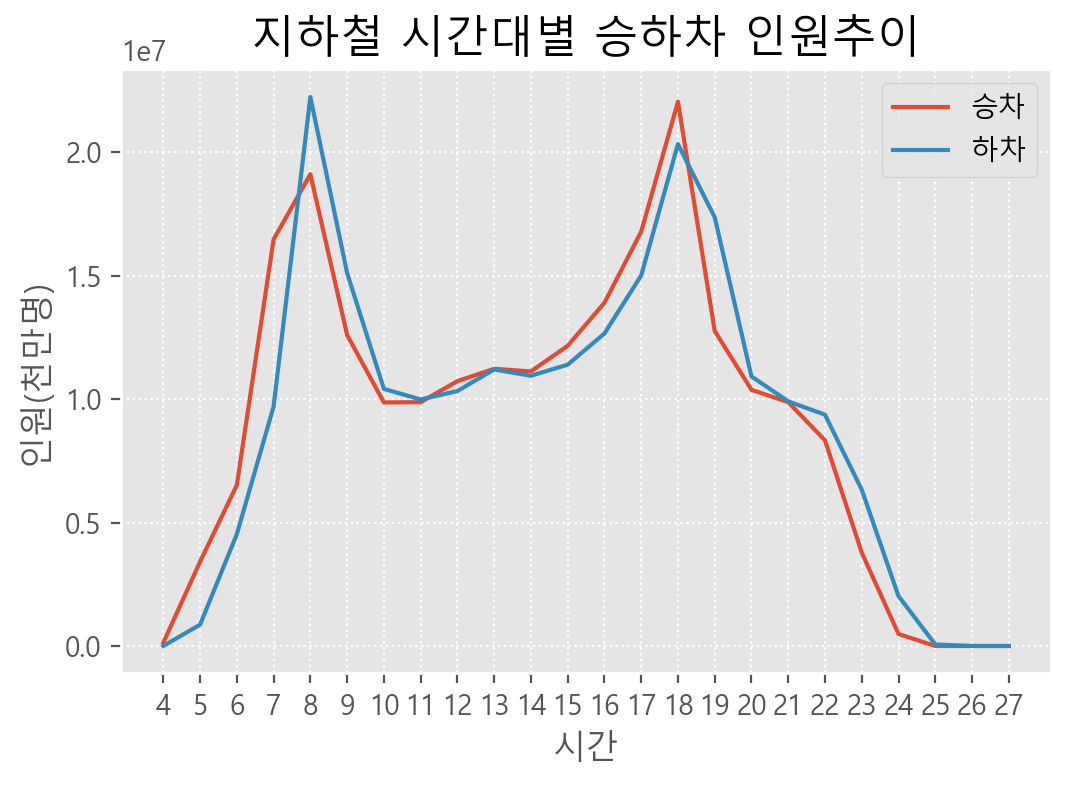

In [36]:
# 모든 지하철역에서 시간대별 승하차 인원
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='utf-8')
data = csv.reader(f)
next(data)
next(data)
s_in = [0] * 24 # 승차 인원 저장 리스트
s_out = [0] *24 # 하차 인원 저장 리스트
for row in data:
    row[4:] = map(int, row[4:])
    for i in range(24):
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]

plt.rc('font', family='Malgun Gothic')

plt.figure(dpi=200)
plt.title('지하철 시간대별 승하차 인원추이', size=16)
plt.grid(linestyle=':') #그리드라인 표시
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.legend()
plt.xticks(range(24), range(4, 28))
plt.xlabel('시간')
plt.ylabel('인원(천만명)')
plt.show()